In [1]:
pip install tensorflow_text

     |████████████████████████████████| 4.9 MB 9.8 MB/s 


In [2]:
from pandas.core.frame import DataFrame
import pandas as pd
import numpy as np
df = pd.read_json(path_or_buf='/content/drive/MyDrive/DL Project/Data/multinli_1.0_train.jsonl', lines=True)


In [3]:
df['annotator_labels'].value_counts()

TypeError: ignored

Exception ignored in: 'pandas._libs.index.IndexEngine._call_map_locations'
Traceback (most recent call last):
  File "pandas/_libs/hashtable_class_helper.pxi", line 1709, in pandas._libs.hashtable.PyObjectHashTable.map_locations
TypeError: unhashable type: 'list'


[contradiction]    130903
[neutral]          130900
[entailment]       130899
Name: annotator_labels, dtype: int64

In [4]:
df.columns

Index(['annotator_labels', 'genre', 'gold_label', 'pairID', 'promptID',
       'sentence1', 'sentence1_binary_parse', 'sentence1_parse', 'sentence2',
       'sentence2_binary_parse', 'sentence2_parse'],
      dtype='object')

In [5]:
df['sentence1'] = df['sentence1'].astype(str)
df['sentence2'] = df['sentence2'].astype(str)

In [6]:
df['annotator_labels'] = df['annotator_labels'].astype(str)

In [7]:
df['annotator_labels'].value_counts()

['contradiction']    130903
['neutral']          130900
['entailment']       130899
Name: annotator_labels, dtype: int64

In [8]:
df['input'] = df['sentence1'] + '[SEP]' + df['sentence2']

In [9]:
df = df[['input','annotator_labels']].copy()

In [10]:
df = pd.DataFrame(df[0:50000], columns=['input', 'annotator_labels'])

In [11]:
df['annotator_labels'].value_counts()

['contradiction']    17884
['entailment']       16875
['neutral']          15241
Name: annotator_labels, dtype: int64

In [12]:
# Multi Class Classification 
y = pd.get_dummies(df.annotator_labels, prefix='annotator')
y["annotator_dum1"] = 0
y["annotator_dum2"] = 0
y["annotator_dum3"] = 0

In [13]:
y

,annotator_['contradiction'],annotator_['entailment'],annotator_['neutral'],annotator_dum1,annotator_dum2,annotator_dum3
0,0,0,1,0,0,0
1,0,1,0,0,0,0
2,0,1,0,0,0,0
3,0,1,0,0,0,0
4,0,0,1,0,0,0
...,...,...,...,...,...,...
49995,0,0,1,0,0,0
49996,0,1,0,0,0,0
49997,1,0,0,0,0,0
49998,0,0,1,0,0,0


In [14]:
import tensorflow as tf
import keras
import tensorflow_hub as hub
import tensorflow_text as text

In [15]:
bert_preprocess = hub.KerasLayer("https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3", trainable=True)
bert_encoder = hub.KerasLayer("https://tfhub.dev/tensorflow/bert_en_uncased_L-12_H-768_A-12/4", trainable=True)

In [16]:
# Bert layers
text_input = tf.keras.layers.Input(shape=(), dtype=tf.string, name='text') # Textual input layer
preprocessed_text = bert_preprocess(text_input) # The preprocessing of text
outputs = bert_encoder(preprocessed_text) # Encoded o/p

# Neural network layers
# l = tf.keras.layers.Dense(50, activation='sigmoid', name="output")(outputs['pooled_output'])
# l = tf.keras.layers.Dense(6, activation='softmax', name="soft_output")(l)

l = tf.keras.layers.Dense(6, activation='softmax', name="soft_output")(outputs['pooled_output'])

# Use inputs and outputs to construct a final model
model = tf.keras.Model(inputs=[text_input], outputs = [l])

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: module, class, method, function, traceback, frame, or code object was expected, got cython_function_or_method
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


ERROR:absl:hub.KerasLayer is trainable but has zero trainable weights.
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: module, class, method, function, traceback, frame, or code object was expected, got cython_function_or_method
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: module, class, method, function, traceback, frame, or code object was expected, got cython_function_or_method
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Cause: while/else statement not yet supported
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Cause: while/else statement not yet supported
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Cause: while/else statement not yet supported
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


In [17]:
import keras
METRICS = [
      tf.keras.metrics.BinaryAccuracy(name='accuracy'),
      tf.keras.metrics.Precision(name='precision'),
      tf.keras.metrics.Recall(name='recall')
]

optimizer = tf.keras.optimizers.Adam(0.00002)
optimizer.learning_rate.assign(0.00002)
model.compile(optimizer=optimizer,
              loss='CategoricalCrossentropy',
              metrics=METRICS)

In [18]:
tf.config.run_functions_eagerly(True)


In [19]:
model.fit(df['input'], y, epochs=3, batch_size=16)

Epoch 1/3


/usr/local/lib/python3.7/dist-packages/tensorflow/python/data/ops/dataset_ops.py:4527: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  "Even though the `tf.config.experimental_run_functions_eagerly` "
/usr/local/lib/python3.7/dist-packages/tensorflow/python/data/ops/dataset_ops.py:4527: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  "Even though the `tf.config.experimental_run_functions_eagerly` "


3125/3125 [==============================] - 1014s 321ms/step - loss: 0.6868 - accuracy: 0.9053 - precision: 0.7618 - recall: 0.6280
Epoch 2/3
3125/3125 [==============================] - 1002s 320ms/step - loss: 0.4216 - accuracy: 0.9466 - precision: 0.8559 - recall: 0.8172
Epoch 3/3
3125/3125 [==============================] - 1003s 321ms/step - loss: 0.2385 - accuracy: 0.9715 - precision: 0.9215 - recall: 0.9061


In [20]:
df_test = pd.read_excel('/content/drive/MyDrive/DL Project/Data/circa_test.xlsx')
df_test['goldstandard2'] = df_test['goldstandard2'].replace(np.nan, 'N/A')
df_test['goldstandard1'] = df_test['goldstandard1'].replace(np.nan, 'N/A')
df_test['goldstandard2'] = df_test['goldstandard2'].astype(str)
df_test['goldstandard1'] = df_test['goldstandard1'].astype(str)
print(df_test['goldstandard2'].value_counts())
df_test['YN'] = df_test['question-X'] + '[SEP]' + df_test['answer-Y']
df_test = df_test[['id','YN','goldstandard2']].copy()
df_test.head(5)

# Multi Class Classification 
y_test = pd.get_dummies(df_test.goldstandard2, prefix='goldstandard2')
y_test

Yes                                  3333
No                                   2593
Yes, subject to some conditions       469
In the middle, neither yes nor no     183
N/A                                   151
Other                                 125
Name: goldstandard2, dtype: int64


,"goldstandard2_In the middle, neither yes nor no",goldstandard2_N/A,goldstandard2_No,goldstandard2_Other,goldstandard2_Yes,"goldstandard2_Yes, subject to some conditions"
0,0,0,0,0,1,0
1,0,0,0,1,0,0
2,0,0,0,0,0,1
3,0,0,1,0,0,0
4,0,0,1,0,0,0
...,...,...,...,...,...,...
6849,0,0,0,0,1,0
6850,0,0,0,0,1,0
6851,0,0,0,0,1,0
6852,0,0,1,0,0,0


In [21]:
y_test = y_test.rename(columns={"goldstandard2_Yes": "annotator_['entailment']", 
                   "goldstandard2_No": "annotator_['contradiction']",
                   "goldstandard2_In the middle, neither yes nor no": "annotator_['neutral']",
                   "goldstandard2_N/A": "annotator_dum1",
                   "goldstandard2_Other":"annotator_dum2",
                   "goldstandard2_Yes, subject to some conditions":"annotator_dum3"})

In [22]:
y_test["annotator_['neutral']"].value_counts()

0    6671
1     183
Name: annotator_['neutral'], dtype: int64

In [23]:
col_names = ["annotator_['contradiction']", "annotator_['entailment']", "annotator_['neutral']", "annotator_dum1", "annotator_dum2", "annotator_dum3"]

y_test = y_test.reindex(columns=col_names)


In [24]:
y_test

,annotator_['contradiction'],annotator_['entailment'],annotator_['neutral'],annotator_dum1,annotator_dum2,annotator_dum3
0,0,1,0,0,0,0
1,0,0,0,0,1,0
2,0,0,0,0,0,1
3,1,0,0,0,0,0
4,1,0,0,0,0,0
...,...,...,...,...,...,...
6849,0,1,0,0,0,0
6850,0,1,0,0,0,0
6851,0,1,0,0,0,0
6852,1,0,0,0,0,0


In [25]:
y_test["annotator_['entailment']"].value_counts()

0    3521
1    3333
Name: annotator_['entailment'], dtype: int64

In [26]:
y_test

,annotator_['contradiction'],annotator_['entailment'],annotator_['neutral'],annotator_dum1,annotator_dum2,annotator_dum3
0,0,1,0,0,0,0
1,0,0,0,0,1,0
2,0,0,0,0,0,1
3,1,0,0,0,0,0
4,1,0,0,0,0,0
...,...,...,...,...,...,...
6849,0,1,0,0,0,0
6850,0,1,0,0,0,0
6851,0,1,0,0,0,0
6852,1,0,0,0,0,0


In [27]:
model.evaluate(df_test['YN'],y_test)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/data/ops/dataset_ops.py:4527: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  "Even though the `tf.config.experimental_run_functions_eagerly` "
/usr/local/lib/python3.7/dist-packages/tensorflow/python/data/ops/dataset_ops.py:4527: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  "Even though the `tf.config.experimental_run_functions_eagerly` "


215/215 [==============================] - 47s 216ms/step - loss: 5.2100 - accuracy: 0.7413 - precision: 0.2223 - recall: 0.2210


[5.209965229034424,
 0.7412945032119751,
 0.22230374813079834,
 0.2210388034582138]

In [28]:
y_predicted = model.predict(df_test['YN'])
# y_predicted = y_predicted.flatten()

/usr/local/lib/python3.7/dist-packages/tensorflow/python/data/ops/dataset_ops.py:4527: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  "Even though the `tf.config.experimental_run_functions_eagerly` "


In [29]:
y_predicted

array([[5.9253825e-03, 5.5809197e-04, 9.9351370e-01, 7.9990099e-07,
        1.2514843e-06, 7.7170637e-07],
       [1.4349317e-02, 2.5518509e-04, 9.8539251e-01, 6.0575650e-07,
        1.0673986e-06, 1.2674245e-06],
       [9.6340179e-01, 5.2987773e-05, 3.6541786e-02, 1.2018598e-06,
        1.5734441e-06, 6.9021809e-07],
       ...,
       [9.8984897e-01, 1.3769217e-04, 1.0010319e-02, 1.0398417e-06,
        1.3201112e-06, 5.4368036e-07],
       [8.3921933e-01, 1.1215266e-04, 1.6066203e-01, 2.5504378e-06,
        2.4561800e-06, 1.5633439e-06],
       [4.5914478e-03, 7.7316500e-02, 9.1808724e-01, 1.8756000e-06,
        1.5546557e-06, 1.4392978e-06]], dtype=float32)

In [30]:
pred_results = tf.cast(tf.equal(y_predicted, tf.reduce_max(y_predicted, axis = 1, keepdims=True)), tf.float32)


In [31]:
pred_results

<tf.Tensor: shape=(6854, 6), dtype=float32, numpy=
array([[0., 0., 1., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0.],
       ...,
       [1., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0.]], dtype=float32)>

In [32]:
pred_results = pd.DataFrame(pred_results.numpy(), columns = ['goldstandard2_No',
                                                             'goldstandard2_Yes',
                                                             'goldstandard2_In the middle, neither yes nor no', 	
                                                             'goldstandard2_N/A',	                                   	
                                                             'goldstandard2_Other', 		
                                                             'goldstandard2_Yes, subject to some conditions'])


In [33]:
pred_results['goldstandard2_Yes'].value_counts()

0.0    6749
1.0     105
Name: goldstandard2_Yes, dtype: int64

In [34]:
pred_results

,goldstandard2_No,goldstandard2_Yes,"goldstandard2_In the middle, neither yes nor no",goldstandard2_N/A,goldstandard2_Other,"goldstandard2_Yes, subject to some conditions"
0,0.0,0.0,1.0,0.0,0.0,0.0
1,0.0,0.0,1.0,0.0,0.0,0.0
2,1.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,1.0,0.0,0.0,0.0
4,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...
6849,0.0,0.0,1.0,0.0,0.0,0.0
6850,0.0,0.0,1.0,0.0,0.0,0.0
6851,1.0,0.0,0.0,0.0,0.0,0.0
6852,1.0,0.0,0.0,0.0,0.0,0.0


In [35]:
pred_results.shape
pred_results.to_numpy()
pred_results = [np.where(r==1)[0][0] for r in pred_results.to_numpy()]
pred_results = pd.DataFrame(pred_results, columns=['goldstandard2'])

In [36]:
pred_results

,goldstandard2
0,2
1,2
2,0
3,2
4,2
...,...
6849,2
6850,2
6851,0
6852,0


In [37]:

pred_results['goldstandard2'] = pred_results['goldstandard2'].map({0:'No', 
                                                   1:'Yes',
                                                   2:'In the middle, neither yes nor no', 
                                                   3:'N/A', 
                                                   4:'Other' ,
                                                   5:'Yes, subject to some conditions',})



In [38]:
y_test

,annotator_['contradiction'],annotator_['entailment'],annotator_['neutral'],annotator_dum1,annotator_dum2,annotator_dum3
0,0,1,0,0,0,0
1,0,0,0,0,1,0
2,0,0,0,0,0,1
3,1,0,0,0,0,0
4,1,0,0,0,0,0
...,...,...,...,...,...,...
6849,0,1,0,0,0,0
6850,0,1,0,0,0,0
6851,0,1,0,0,0,0
6852,1,0,0,0,0,0


In [39]:
y_test.shape
y_test.to_numpy()
test_gtruths = [np.where(r==1)[0][0] for r in y_test.to_numpy()]
test_gtruths = pd.DataFrame(test_gtruths, columns=['goldstandard2'])

test_gtruths['goldstandard2'] = test_gtruths['goldstandard2'].map({0:'No', 
                                                   1:'Yes',
                                                   2:'In the middle, neither yes nor no', 
                                                   3:'N/A', 
                                                   4:'Other' ,
                                                   5:'Yes, subject to some conditions',})


In [40]:
test_gtruths

,goldstandard2
0,Yes
1,Other
2,"Yes, subject to some conditions"
3,No
4,No
...,...
6849,Yes
6850,Yes
6851,Yes
6852,No


In [41]:

print('BERT MNLI')
from sklearn.metrics import classification_report
print(classification_report(y_true = test_gtruths['goldstandard2'], y_pred = pred_results['goldstandard2']))

BERT MNLI
                                   precision    recall  f1-score   support

In the middle, neither yes nor no       0.02      0.58      0.04       183
                              N/A       0.00      0.00      0.00       151
                               No       0.61      0.52      0.57      2593
                            Other       0.00      0.00      0.00       125
                              Yes       0.53      0.02      0.03      3333
  Yes, subject to some conditions       0.00      0.00      0.00       469

                         accuracy                           0.22      6854
                        macro avg       0.20      0.19      0.11      6854
                     weighted avg       0.49      0.22      0.23      6854



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


NOW CIRCA-YN TRAINING


In [42]:
df = pd.read_excel('/content/drive/MyDrive/DL Project/Data/circa_train.xlsx')
df['goldstandard2'] = df['goldstandard2'].replace(np.nan, 'N/A')
df['goldstandard1'] = df['goldstandard1'].replace(np.nan, 'N/A')
df['goldstandard2'] = df['goldstandard2'].astype(str)
df['goldstandard1'] = df['goldstandard1'].astype(str)

df['YN'] = df['question-X'] + '[SEP]' + df['answer-Y']

df = df[['YN','goldstandard2']].copy()

# Multi Class Classification 
y = pd.get_dummies(df.goldstandard2, prefix='goldstandard2')
y

,"goldstandard2_In the middle, neither yes nor no",goldstandard2_N/A,goldstandard2_No,goldstandard2_Other,goldstandard2_Yes,"goldstandard2_Yes, subject to some conditions"
0,1,0,0,0,0,0
1,0,0,0,0,1,0
2,0,0,0,0,1,0
3,0,0,1,0,0,0
4,0,0,1,0,0,0
...,...,...,...,...,...,...
20555,0,0,1,0,0,0
20556,0,0,1,0,0,0
20557,0,0,1,0,0,0
20558,0,0,0,0,1,0


In [43]:
import keras
METRICS = [
      tf.keras.metrics.BinaryAccuracy(name='accuracy'),
      tf.keras.metrics.Precision(name='precision'),
      tf.keras.metrics.Recall(name='recall')
]

optimizer = tf.keras.optimizers.Adam(0.00005)
optimizer.learning_rate.assign(0.00005)
model.compile(optimizer=optimizer,
              loss='CategoricalCrossentropy',
              metrics=METRICS)

In [44]:
model.fit(df['YN'], y, epochs=3, batch_size=32)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/data/ops/dataset_ops.py:4527: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  "Even though the `tf.config.experimental_run_functions_eagerly` "
/usr/local/lib/python3.7/dist-packages/tensorflow/python/data/ops/dataset_ops.py:4527: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  "Even though the `tf.config.experimental_run_functions_eagerly` "


Epoch 1/3
643/643 [==============================] - 367s 564ms/step - loss: 0.7627 - accuracy: 0.9178 - precision: 0.7802 - recall: 0.7056
Epoch 2/3
643/643 [==============================] - 363s 565ms/step - loss: 0.4382 - accuracy: 0.9549 - precision: 0.8803 - recall: 0.8442
Epoch 3/3
643/643 [==============================] - 363s 565ms/step - loss: 0.2932 - accuracy: 0.9709 - precision: 0.9266 - recall: 0.8964


In [45]:
df_valid = pd.read_excel('/content/drive/MyDrive/DL Project/Data/circa_test.xlsx')
df_valid['goldstandard2'] = df_valid['goldstandard2'].replace(np.nan, 'N/A')
df_valid['goldstandard1'] = df_valid['goldstandard1'].replace(np.nan, 'N/A')
df_valid['goldstandard2'] = df_valid['goldstandard2'].astype(str)
df_valid['goldstandard1'] = df_valid['goldstandard1'].astype(str)
df_valid['YN'] = df_valid['question-X'] + '[SEP]' + df_valid['answer-Y']
df_valid = df_valid[['id','YN','goldstandard2']].copy()
df_valid.head(5)

# Multi Class Classification 
y_valid = pd.get_dummies(df_valid.goldstandard2, prefix='goldstandard2')
y_valid

model.evaluate(df_valid['YN'], y_valid)

y_predicted = model.predict(df_valid['YN'])
# y_predicted = y_predicted.flatten()

/usr/local/lib/python3.7/dist-packages/tensorflow/python/data/ops/dataset_ops.py:4527: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  "Even though the `tf.config.experimental_run_functions_eagerly` "
/usr/local/lib/python3.7/dist-packages/tensorflow/python/data/ops/dataset_ops.py:4527: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  "Even though the `tf.config.experimental_run_functions_eagerly` "


215/215 [==============================] - 46s 216ms/step - loss: 0.5137 - accuracy: 0.9509 - precision: 0.8625 - recall: 0.8394


In [49]:
pred_results = tf.cast(tf.equal(y_predicted, tf.reduce_max(y_predicted, axis = 1, keepdims=True)), tf.float32)

pred_results = pd.DataFrame(pred_results.numpy(), columns = ['goldstandard2_In the middle, neither yes nor no', 	
                                       'goldstandard2_N/A',	
                                       'goldstandard2_No',	
                                       'goldstandard2_Other', 	
                                       'goldstandard2_Yes', 	
                                       'goldstandard2_Yes, subject to some conditions'])

pred_results.shape
pred_results.to_numpy()
pred_results = [np.where(r==1)[0][0] for r in pred_results.to_numpy()]
pred_results = pd.DataFrame(pred_results, columns=['goldstandard2'])

pred_results['goldstandard2'] = pred_results['goldstandard2'].map({0:'In the middle, neither yes nor no', 
                                                   1:'N/A',
                                                   2:'No', 
                                                   3:'Other', 
                                                   4:'Yes' ,
                                                   5:'Yes, subject to some conditions',})

y_valid.shape
y_valid.to_numpy()
validation_gtruths = [np.where(r==1)[0][0] for r in y_valid.to_numpy()]
validation_gtruths = pd.DataFrame(validation_gtruths, columns=['goldstandard2'])

validation_gtruths['goldstandard2'] = validation_gtruths['goldstandard2'].map({0:'In the middle, neither yes nor no', 
                                                   1:'N/A',
                                                   2:'No', 
                                                   3:'Other', 
                                                   4:'Yes' ,
                                                   5:'Yes, subject to some conditions',})

print('BERT MNLI YN')
from sklearn.metrics import classification_report
print(classification_report(y_true = validation_gtruths['goldstandard2'], y_pred = pred_results['goldstandard2']))

BERT MNLI YN
                                   precision    recall  f1-score   support

In the middle, neither yes nor no       0.60      0.28      0.39       183
                              N/A       0.00      0.00      0.00       151
                               No       0.85      0.87      0.86      2593
                            Other       0.87      0.99      0.93       125
                              Yes       0.87      0.89      0.88      3333
  Yes, subject to some conditions       0.82      0.90      0.86       469

                         accuracy                           0.85      6854
                        macro avg       0.67      0.66      0.65      6854
                     weighted avg       0.83      0.85      0.84      6854



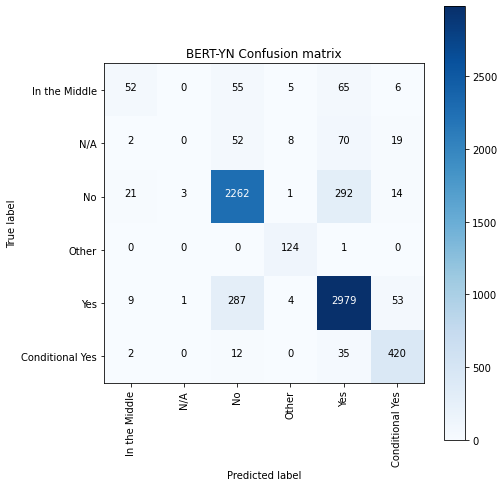

In [50]:
from sklearn.metrics import confusion_matrix
cmat = confusion_matrix(validation_gtruths['goldstandard2'], pred_results['goldstandard2'])

import numpy as np
import itertools
import matplotlib.pyplot as plt
# https://www.kaggle.com/fuzzywizard/fashion-mnist-cnn-keras-accuracy-93
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='BERT-YN Confusion matrix',
                          cmap=plt.cm.Blues):
    plt.figure(figsize=(7,7))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=90)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

plot_confusion_matrix(cmat, 
            classes = ['In the Middle','N/A','No','Other','Yes','Conditional Yes'])

In [48]:
pred_results['id'] = df_test['id']
sub_results = pred_results
sub_results = sub_results.rename(columns={"goldstandard2": "BERT MNLI YN"})

results_df = pd.read_excel('/content/drive/MyDrive/DL Project/Results/ModelResultsFINAL.xlsx')

results_df = results_df.drop(['Unnamed: 0'], axis = 1)
results_df['BERT MNLI YN'] = sub_results['BERT MNLI YN']

column_names = ["id", "question-X", "answer-Y","BERT YN Q only","BERT YN A only","BERT YN Q+A", "BERT DIS YN", "BERT BOOLq YN","BERT MNLI YN","goldstandard2"]


results_df = results_df.reindex(columns=column_names)

results_df.to_excel('/content/drive/MyDrive/DL Project/Results/ModelResultsFINAL.xlsx')